# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save the needed information into arrays
all_cities = []
lon = []
lat = []
lat = []
max_temp = []
humidity = []
clouds = []
winds = []
country = []
temp_date = []

# Initial counters
count = 0
set = 1

# Start the url for the api call
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # If there have been 50 calls, make it sleep so we don't do too many calls in api limit
    if count == 49:
        time.sleep(1)
        count = 0
        set+= 1
    else:
        count +=1
     
    # Reguest the data and convert to json
    response = requests.get(url + city).json()
    
    # Try to get the data from the response
    try:
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        temp_date.append(response['dt'])
        all_cities.append(city)
        
        print(f"Processing Record {count} of set {set} | {city}")
        
    # If the api call did not work
    except:
        print(f"{city} not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | henderson
Processing Record 2 of set 1 | cherskiy
Processing Record 3 of set 1 | port alfred
Processing Record 4 of set 1 | santiago del estero
Processing Record 5 of set 1 | khatanga
Processing Record 6 of set 1 | alice springs
Processing Record 7 of set 1 | igurusi
Processing Record 8 of set 1 | teguldet
Processing Record 9 of set 1 | port lincoln
Processing Record 10 of set 1 | taoudenni
Processing Record 11 of set 1 | yellowknife
Processing Record 12 of set 1 | talnakh
Processing Record 13 of set 1 | new norfolk
Processing Record 14 of set 1 | airai
Processing Record 15 of set 1 | albany
Processing Record 16 of set 1 | cairns
Processing Record 17 of set 1 | luderitz
taolanaro not found. Skipping...
Processing Record 19 of set 1 | hermanus
Processing Record 20 of set 1 | healdsburg
Processing Record 21 of set 1 | katherine
Processing Record 22 of set 1 | anloga
amderma not found. Skipping...
Proces

artyk not found. Skipping...
Processing Record 3 of set 5 | port-cartier
Processing Record 4 of set 5 | georgetown
Processing Record 5 of set 5 | carnarvon
Processing Record 6 of set 5 | santa cruz
Processing Record 7 of set 5 | markkleeberg
Processing Record 8 of set 5 | kabinda
Processing Record 9 of set 5 | naples
Processing Record 10 of set 5 | san cristobal
Processing Record 11 of set 5 | belyy yar
Processing Record 12 of set 5 | hofn
Processing Record 13 of set 5 | sylvan lake
mys shmidta not found. Skipping...
Processing Record 15 of set 5 | castro
Processing Record 16 of set 5 | klyuchi
Processing Record 17 of set 5 | aklavik
Processing Record 18 of set 5 | sabang
Processing Record 19 of set 5 | saint-philippe
Processing Record 20 of set 5 | hambantota
Processing Record 21 of set 5 | sinnamary
Processing Record 22 of set 5 | pitimbu
Processing Record 23 of set 5 | maniitsoq
Processing Record 24 of set 5 | alofi
Processing Record 25 of set 5 | nikolskoye
Processing Record 26 of 

Processing Record 4 of set 9 | gashua
Processing Record 5 of set 9 | baculin
Processing Record 6 of set 9 | galesong
Processing Record 7 of set 9 | tamandare
Processing Record 8 of set 9 | tuatapere
Processing Record 9 of set 9 | tromso
Processing Record 10 of set 9 | fairmont
Processing Record 11 of set 9 | dharchula
Processing Record 12 of set 9 | tarrega
viligili not found. Skipping...
Processing Record 14 of set 9 | batagay-alyta
Processing Record 15 of set 9 | marshall
Processing Record 16 of set 9 | elliot lake
Processing Record 17 of set 9 | zhireken
Processing Record 18 of set 9 | ambilobe
Processing Record 19 of set 9 | morunglav
Processing Record 20 of set 9 | tahoua
Processing Record 21 of set 9 | altus
satitoa not found. Skipping...
Processing Record 23 of set 9 | bronnoysund
Processing Record 24 of set 9 | lagoa
Processing Record 25 of set 9 | timizart
Processing Record 26 of set 9 | cukai
Processing Record 27 of set 9 | cacule
Processing Record 28 of set 9 | ossora
Proces

Processing Record 3 of set 13 | moctezuma
Processing Record 4 of set 13 | mmabatho
Processing Record 5 of set 13 | manchester
marcona not found. Skipping...
Processing Record 7 of set 13 | sabla
Processing Record 8 of set 13 | la rioja
Processing Record 9 of set 13 | balabac
Processing Record 10 of set 13 | carutapera
tumannyy not found. Skipping...
Processing Record 12 of set 13 | shetpe
Processing Record 13 of set 13 | banjar
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Make a dictionary
weather_dict = {
    "City": all_cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": winds,
    "Country": country,
    "Date": temp_date
}

# Convert to data frame
weather_data = pd.DataFrame(weather_dict)

# Save to .csv
weather_data.to_csv('../output_data/cities.csv', index=False)

# Print out first 5 rows
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,henderson,36.04,-114.98,38.89,12,1,7.70,US,1595536297
1,cherskiy,68.75,161.30,19.31,62,5,3.90,RU,1595536297
2,port alfred,-33.59,26.89,17.74,45,0,4.54,ZA,1595536028
3,santiago del estero,-27.80,-64.26,13.02,39,100,6.20,AR,1595536297
4,khatanga,71.97,102.50,5.79,90,100,7.44,RU,1595536297


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Check if any cities have a humidity more than100%
humid_cities = weather_data.loc[weather_data['Humidity'] > 100, : ]
humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_list = humid_cities.index
humid_list

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data[weather_data["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,henderson,36.04,-114.98,38.89,12,1,7.70,US,1595536297
1,cherskiy,68.75,161.30,19.31,62,5,3.90,RU,1595536297
2,port alfred,-33.59,26.89,17.74,45,0,4.54,ZA,1595536028
3,santiago del estero,-27.80,-64.26,13.02,39,100,6.20,AR,1595536297
4,khatanga,71.97,102.50,5.79,90,100,7.44,RU,1595536297
...,...,...,...,...,...,...,...,...,...
560,la rioja,42.25,-2.50,25.00,53,6,3.10,ES,1595536503
561,balabac,7.99,117.06,27.31,79,100,4.57,PH,1595536503
562,carutapera,-1.20,-46.02,26.17,81,12,3.28,BR,1595536474
563,shetpe,44.17,52.12,23.71,34,0,1.41,KZ,1595536504


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

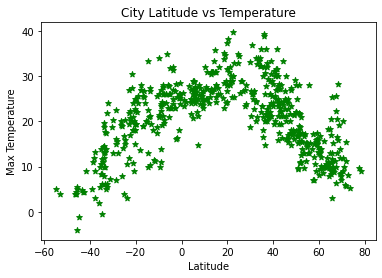

In [8]:
# Create the scattor plot graphs

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="*", color="green")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the graph
plt.savefig('../output_data/fig1.png')

plt.show()

## Latitude vs. Humidity Plot

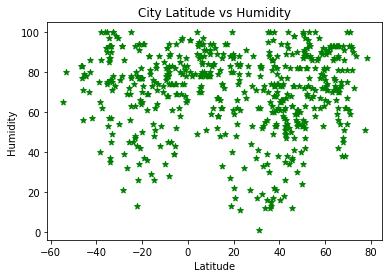

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="*", color="green")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the graph
plt.savefig("../output_data/fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

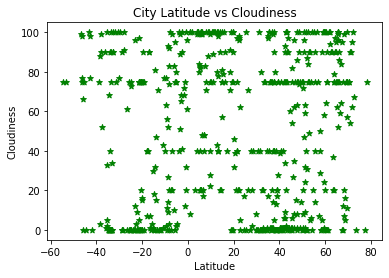

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="*", color="green")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the graph
plt.savefig("../output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

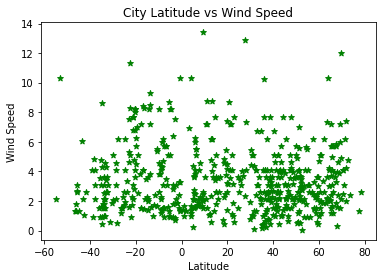

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="*", color="green")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the graph
plt.savefig("../output_data/fig4.png")

plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data = clean_city_data[clean_city_data["Lat"] > 0]
southern_city_data = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temp is: -0.69


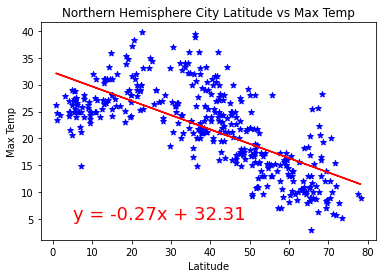

In [14]:
# Do the linear regressions

x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Max Temp"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (5,5), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The correlation between latitude and max temp is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temp is: 0.75


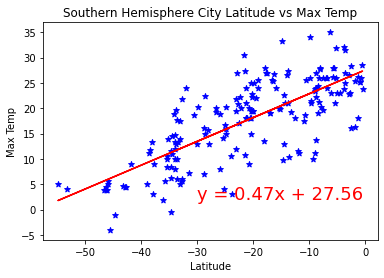

In [15]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Max Temp"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-30,2), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The correlation between latitude and max temp is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is: -0.01


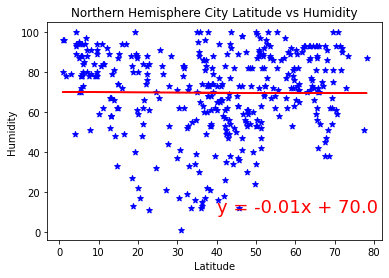

In [16]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Humidity"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (40,10), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation between latitude and humidity is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is: -0.07


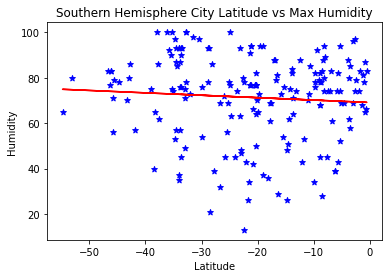

In [17]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Humidity"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-30,5), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation between latitude and humidity is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is: -0.07


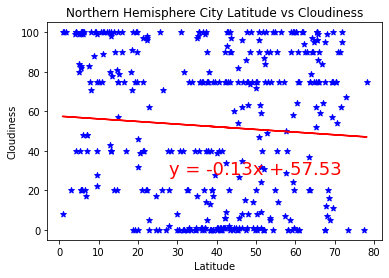

In [18]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Cloudiness"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (28,28), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The correlation between latitude and cloudiness is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is: -0.02


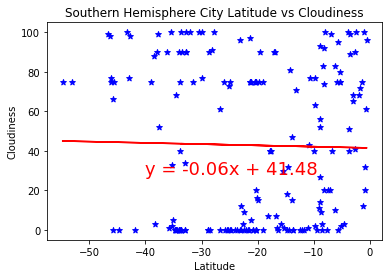

In [19]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Cloudiness"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-40,28), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The correlation between latitude and cloudiness is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is: -0.02


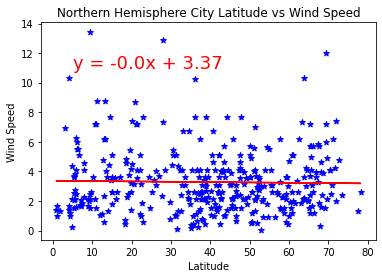

In [20]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Wind Speed"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (5,11), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation between latitude and wind speed is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is: 0.13


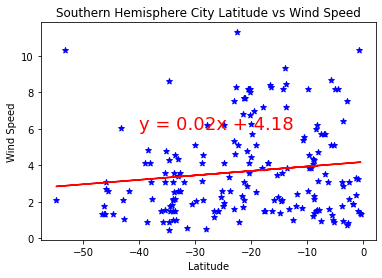

In [22]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Wind Speed"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-40,6), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation between latitude and wind speed is: {round(correlation[0],2)}")

plt.show()

# Observable Trends
1. There is a strong correlation between latitude and maximum temperatures when the data is broken into northern and southern hemispheres.  This makes sense, since the closer you get to the equator the hotter it is going to be.


2. It looks like there is basically no correlation between latitude and cloudiness.  So cloudiness happens all over the globe.


3. There also is little correlation between latitude and wind speed.  It looks like wind speed is not affected by the latitude.  